<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/Semantic_Chunking_Advanced_Chunking_Strategy_Lanchain_Groq_RAGAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install required dependencies

In [1]:
!pip install -qU langchain_experimental langchain_openai langchain_community langchain ragas chromadb langchain-groq fastembed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.3/291.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.2/115.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [8]:
! pip install pypdf openai

## Check the versions installed


langchain==0.1.16

langchain-community==0.0.34

langchain-core==0.1.45

langchain-experimental==0.0.57

langchain-groq==0.1.2

langchain-openai==0.1.3

langchain-text-splitters==0.0.1

langcodes==3.3.0

langsmith==0.1.49

chromadb==0.4.24

ragas==0.1.7

fastembed==0.2.6

## Download Data

In [2]:
! wget "https://arxiv.org/pdf/1810.04805.pdf"

--2024-04-21 03:09:18--  https://arxiv.org/pdf/1810.04805.pdf
Resolving arxiv.org (arxiv.org)... 151.101.131.42, 151.101.67.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.131.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 775166 (757K) [application/pdf]
Saving to: ‘1810.04805.pdf’

1810.04805.pdf      100%[===================>] 757.00K  --.-KB/s    in 0.06s   

2024-04-21 03:09:19 (13.0 MB/s) - ‘1810.04805.pdf’ saved [775166/775166]



## Read the content of the pdf

In [4]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter


In [9]:
loader = PyPDFLoader("1810.04805.pdf")
documents = loader.load()

In [10]:
print(len(documents))

16


## RecursiveCharacterTextSplitter AKA "Naive Chunking"

In [11]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=0,
    length_function=len,
    is_separator_regex=False
)

In [13]:
naive_chunks = text_splitter.split_documents(documents)
for chunk in naive_chunks[10:15]:
  print(chunk.page_content+ "\n")

BERT BERT 
E[CLS] E1 E[SEP] ... ENE1’... EM’
C
T1
T[SEP] ...
 TN
T1’...
 TM’
[CLS] Tok 1 [SEP] ... Tok NTok 1 ... TokM 
Question Paragraph Start/End Span 
BERT 
E[CLS] E1 E[SEP] ... ENE1’... EM’
C
T1
T[SEP] ...
 TN
T1’...
 TM’
[CLS] Tok 1 [SEP] ... Tok NTok 1 ... TokM 
Masked Sentence A Masked Sentence B 
Pre-training Fine-Tuning NSP Mask LM Mask LM 
Unlabeled Sentence A and B Pair SQuAD 
Question Answer Pair NER MNLI Figure 1: Overall pre-training and ﬁne-tuning procedures for BERT. Apart from output layers, the same architec-
tures are used in both pre-training and ﬁne-tuning. The same pre-trained model parameters are used to initialize
models for different down-stream tasks. During ﬁne-tuning, all parameters are ﬁne-tuned. [CLS] is a special
symbol added in front of every input example, and [SEP] is a special separator token (e.g. separating ques-
tions/answers).
ing and auto-encoder objectives have been used
for pre-training such models (Howard and Ruder,

2018; Radford et al., 201

## Instantiate Embeding Model

In [14]:
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings
embed_model = FastEmbedEmbeddings(model_name="BAAI/bge-base-en-v1.5")

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

ort_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

model_optimized.onnx:   0%|          | 0.00/218M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

## Semantic Chunking
Now let's implement the `SemanticChunker`!

We're going to be using the `percentile` threshold as an example today - but there's three different strategies you could use (descriptions provided by the [LangChain docs](https://python.langchain.com/docs/modules/data_connection/document_transformers/semantic-chunker) on Semantic Chunking):

- `percentile` (default) - In this method, all differences between sentences are calculated, and then any difference greater than the X percentile is split.

- `standard_deviation` - In this method, any difference greater than X standard deviations is split.

- `interquartile` - In this method, the interquartile distance is used to split chunks.

The basic idea is as follows:

1. Split our document into sentences (based on `.`, `?`, and `!`)
2. Index each sentence based on position
3. Add a `buffer_size` (`int`) of sentences on either side of our selected sentence
4. Calculate distances between groups of sentences
5. Merge groups based on similarity based on the above thresholds

> NOTE: This method is currently experimental and is not in a stable final form - expect updates and improvements in the coming months



In [15]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

semantic_chunker = SemanticChunker(embed_model, breakpoint_threshold_type="percentile")

#### Create semantic chunk from the documents

In [20]:
semantic_chunks = semantic_chunker.create_documents([d.page_content for d in documents])

In [21]:
for semantic_chunk in semantic_chunks:
  if "Effect of Pre-training Tasks" in semantic_chunk.page_content:
    print(semantic_chunk.page_content)
    print(len(semantic_chunk.page_content))

Dev Set
Tasks MNLI-m QNLI MRPC SST-2 SQuAD
(Acc) (Acc) (Acc) (Acc) (F1)
BERT BASE 84.4 88.4 86.7 92.7 88.5
No NSP 83.9 84.9 86.5 92.6 87.9
LTR & No NSP 82.1 84.3 77.5 92.1 77.8
+ BiLSTM 82.1 84.1 75.7 91.6 84.9
Table 5: Ablation over the pre-training tasks using the
BERT BASE architecture. “No NSP” is trained without
the next sentence prediction task. “LTR & No NSP” is
trained as a left-to-right LM without the next sentence
prediction, like OpenAI GPT. “+ BiLSTM” adds a ran-
domly initialized BiLSTM on top of the “LTR + No
NSP” model during ﬁne-tuning. ablation studies can be found in Appendix C. 5.1 Effect of Pre-training Tasks
We demonstrate the importance of the deep bidi-
rectionality of BERT by evaluating two pre-
training objectives using exactly the same pre-
training data, ﬁne-tuning scheme, and hyperpa-
rameters as BERT BASE :
No NSP : A bidirectional model which is trained
using the “masked LM” (MLM) but without the
“next sentence prediction” (NSP) task. LTR & No NSP : A left

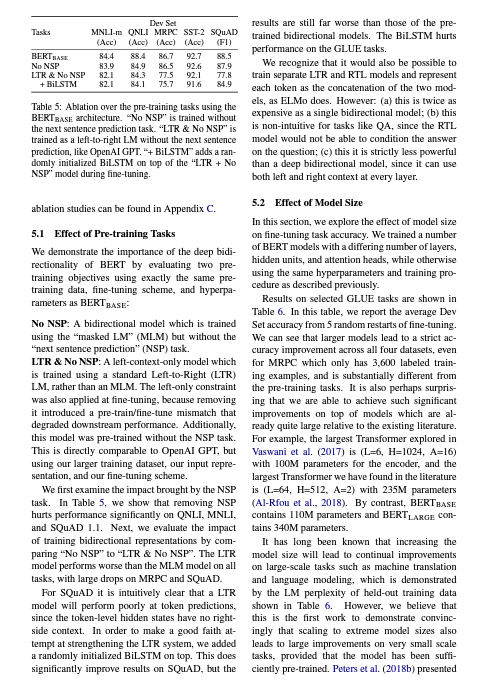

In [ ]:
print(len(semantic_chunks))

## Instantiate LLM

In [28]:
from google.colab import userdata
from groq import Groq
from langchain_groq import ChatGroq
#
groq_api_key = userdata.get("GROQ_API_KEY")
#


## Instantiate the Vectorstore

In [24]:
from langchain_community.vectorstores import Chroma
semantic_chunk_vectorstore = Chroma.from_documents(semantic_chunks, embedding=embed_model)

We will "limit" our semantic retriever to k = 1 to demonstrate the power of the semantic chunking strategy while maintaining similar token counts between the semantic and naive retrieved context.

## Retrieval

In [25]:
semantic_chunk_retriever = semantic_chunk_vectorstore.as_retriever(search_kwargs={"k" : 1})


In [26]:
semantic_chunk_retriever.invoke("Describe the Feature-based Approach with BERT?")

[Document(page_content='The right part of the paper represents the\nDev set results. For the feature-based approach,\nwe concatenate the last 4 layers of BERT as the\nfeatures, which was shown to be the best approach\nin Section 5.3. From the table it can be seen that ﬁne-tuning is\nsurprisingly robust to different masking strategies. However, as expected, using only the M ASK strat-\negy was problematic when applying the feature-\nbased approach to NER. Interestingly, using only\nthe R NDstrategy performs much worse than our\nstrategy as well.')]

## Augmentation

In [27]:
from langchain_core.prompts import ChatPromptTemplate

rag_template = """\
Use the following context to answer the user's query. If you cannot answer, please respond with 'I don't know'.

User's Query:
{question}

Context:
{context}
"""

rag_prompt = ChatPromptTemplate.from_template(rag_template)

## Generation

In [103]:
chat_model = ChatGroq(temperature=0,
                      model_name="mixtral-8x7b-32768",
                      api_key=userdata.get("GROQ_API_KEY"),)

## Creating a RAG Pipeline Utilizing Semantic Chunking

In [30]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

semantic_rag_chain = (
    {"context" : semantic_chunk_retriever, "question" : RunnablePassthrough()}
    | rag_prompt
    | chat_model
    | StrOutputParser()
)

## Ask a question

In [31]:
semantic_rag_chain.invoke("Describe the Feature-based Approach with BERT?")

'The feature-based approach with BERT, as mentioned in the context, involves using BERT as a feature extractor for a downstream natural language processing task, specifically Named Entity Recognition (NER) in this case.\n\nTo use BERT in a feature-based approach, the last 4 layers of BERT are concatenated to serve as the features for the task. This was found to be the most effective approach in Section 5.3 of the paper.\n\nThe context also mentions that fine-tuning BERT is surprisingly robust to different masking strategies. However, when using the feature-based approach for NER, using only the MASK strategy was problematic. Additionally, using only the RND strategy performed much worse than the proposed strategy.\n\nIn summary, the feature-based approach with BERT involves using the last 4 layers of BERT as features for a downstream NLP task, and fine-tuning these features for the specific task. The approach was found to be robust to different masking strategies, but using only certai

## Question 2

In [32]:
semantic_rag_chain.invoke("What is SQuADv2.0?")

'SQuAD v2.0, or Squad Two Point Zero, is a version of the Stanford Question Answering Dataset (SQuAD) that extends the problem definition of SQuAD 1.1 by allowing for the possibility that no short answer exists in the provided paragraph. This makes the problem more realistic, as not all questions have a straightforward answer within the provided text. The SQuAD 2.0 task uses a simple approach to extend the SQuAD 1.1 BERT model for this task, by treating questions that do not have an answer as having an answer span with start and end at the [CLS] token, and comparing the score of the no-answer span to the score of the best non-null span for prediction. The document also mentions that the BERT ensemble, which is a combination of 7 different systems using different pre-training checkpoints and fine-tuning seeds, outperforms all existing systems by a wide margin in SQuAD 2.0, even when excluding entries that use BERT as one of their components.'

## Question 3

In [33]:
semantic_rag_chain.invoke("What is the purpose of Ablation Studies?")

'Ablation studies are used to understand the impact of different components or settings of a machine learning model on its performance. In the provided context, ablation studies are used to answer questions about the effect of the number of training steps and masking procedures on the performance of the BERT model. By comparing the performance of the model under different conditions, researchers can gain insights into the importance of these components or settings and how they contribute to the overall performance of the model.'

## Implement a RAG pipeline using Naive Chunking Startegy

In [34]:
naive_chunk_vectorstore = Chroma.from_documents(naive_chunks, embedding=embed_model)

Notice that we're going to use k = 10 here - this is to "make it a fair comparison" between the two strategies.

In [120]:
naive_chunk_retriever = naive_chunk_vectorstore.as_retriever(search_kwargs={"k" : 5})

In [121]:
naive_rag_chain = (
    {"context" : naive_chunk_retriever, "question" : RunnablePassthrough()}
    | rag_prompt
    | chat_model
    | StrOutputParser()
)

## Ask Question

In [37]:
naive_rag_chain.invoke("Describe the Feature-based Approach with BERT?")

'The Feature-based Approach with BERT involves extracting fixed features from the pre-trained BERT model, as opposed to the fine-tuning approach where all parameters are jointly fine-tuned on a downstream task. The feature-based approach has certain advantages, such as being applicable to tasks that cannot be easily represented by a Transformer encoder architecture, and providing major computational benefits by pre-computing an expensive representation of the training data once and then running many experiments with cheaper models on top of this representation. In the context provided, the feature-based approach is compared to the fine-tuning approach on the CoNLL-2003 Named Entity Recognition (NER) task, with the feature-based approach using a case-preserving WordPiece model and including the maximal document context provided by the data. The results presented in Table 7 show the performance of both approaches on the NER task.'

## Question 2

In [38]:
naive_rag_chain.invoke("What is SQuADv2.0?")

'SQuAD v2.0, or the Stanford Question Answering Dataset version 2.0, is a collection of question/answer pairs that extends the SQuAD v1.1 problem definition by allowing for the possibility that no short answer exists in the provided paragraph. This makes the problem more realistic. The SQuAD v2.0 BERT model is extended from the SQuAD v1.1 model by treating questions that do not have an answer as having an answer span with start and end at the [CLS] token, and extending the probability space for the start and end answer span positions to include the position of the [CLS] token. For prediction, the score of the no-answer span is compared to the score of the best non-null span.'

## Question 3

In [39]:
naive_rag_chain.invoke("What is the purpose of Ablation Studies?")

"Ablation studies are used to evaluate the effect of different components or settings in a machine learning model. In the provided context, ablation studies are used to understand the impact of certain aspects of the BERT model, such as the number of training steps and masking procedures, on the model's performance.\n\nFor instance, one ablation study investigates the effect of the number of training steps on BERT's performance. The results show that BERT BASE achieves higher fine-tuning accuracy on MNLI when trained for 1M steps compared to 500k steps, indicating that a larger number of training steps contributes to better performance.\n\nAnother ablation study focuses on different masking procedures during pre-training. The study compares BERT's masked language model (MLM) with a left-to-right strategy. The results demonstrate that the masking strategies aim to reduce the mismatch between pre-training and fine-tuning, as the [MASK] symbol does not appear during the fine-tuning stage.

## Ragas Assessment Comparison

Let's go ahead and leverage a great tool: [Ragas](https://docs.ragas.io/en/stable/getstarted/index.html)!

We're going to split our documents utilizing a different chunking strategy to avoid any "cheating" by the naive retriever.

In [40]:
synthetic_data_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=0,
    length_function=len,
    is_separator_regex=False
)

In [41]:
synthetic_data_chunks = synthetic_data_splitter.create_documents([d.page_content for d in documents])
print(len(synthetic_data_chunks))

72


## Then we will create:

```
Questions - synthetically generated (gpt-3.5-turbo)
Contexts - created above
Ground Truths - synthetically generated (gpt-4-turbo-preview)
Answers - generated from our Semantic RAG Chain
```

In [58]:
questions = []
ground_truths_semantic = []
contexts = []
answers = []

question_prompt = """\
You are a teacher preparing a test. Please create a question that can be answered by referencing the following context.

Context:
{context}
"""

question_prompt = ChatPromptTemplate.from_template(question_prompt)

ground_truth_prompt = """\
Use the following context and question to answer this question using *only* the provided context.

Question:
{question}

Context:
{context}
"""

ground_truth_prompt = ChatPromptTemplate.from_template(ground_truth_prompt)

question_chain = question_prompt | chat_model | StrOutputParser()
ground_truth_chain = ground_truth_prompt | chat_model | StrOutputParser()

for chunk in synthetic_data_chunks[10:20]:
  questions.append(question_chain.invoke({"context" : chunk.page_content}))
  contexts.append([chunk.page_content])
  ground_truths_semantic.append(ground_truth_chain.invoke({"question" : questions[-1], "context" : contexts[-1]}))
  answers.append(semantic_rag_chain.invoke(questions[-1]))

In [59]:
len(questions), len(answers), len(contexts), len(ground_truths_semantic)

(10, 10, 10, 10)

In [60]:
questions[0]

'Question: What special symbols are added to the input examples in BERT and what is their purpose?\n\nAnswer: The special symbols added to the input examples in BERT are [CLS] and [SEP]. [CLS] is added at the beginning of every input example and is used as a special classification token. [SEP] is used as a special separator token, for example, to separate questions and answers.'

In [61]:
answers[0]

'The special symbols added to the input examples in BERT are [CLS] and [SEP]. [CLS] is added at the beginning of every input example and is used as a special classification token. [SEP] is used as a special separator token, for example, to separate questions and answers.'

In [62]:
ground_truths_semantic[0]

'The special symbols added to the input examples in BERT are [CLS] and [SEP]. [CLS] is added at the beginning of every input example and is used as a special classification token. [SEP] is used as a special separator token, for example, to separate questions and answers. These symbols are used in both pre-training and fine-tuning of BERT and are used to differentiate between different parts of the input.'

In [63]:
contexts[0]

['BERT BERT \nE[CLS] E1 E[SEP] ... ENE1’... EM’\nC\nT1\nT[SEP] ...\n TN\nT1’...\n TM’\n[CLS] Tok 1 [SEP] ... Tok NTok 1 ... TokM \nQuestion Paragraph Start/End Span \nBERT \nE[CLS] E1 E[SEP] ... ENE1’... EM’\nC\nT1\nT[SEP] ...\n TN\nT1’...\n TM’\n[CLS] Tok 1 [SEP] ... Tok NTok 1 ... TokM \nMasked Sentence A Masked Sentence B \nPre-training Fine-Tuning NSP Mask LM Mask LM \nUnlabeled Sentence A and B Pair SQuAD \nQuestion Answer Pair NER MNLI Figure 1: Overall pre-training and ﬁne-tuning procedures for BERT. Apart from output layers, the same architec-\ntures are used in both pre-training and ﬁne-tuning. The same pre-trained model parameters are used to initialize\nmodels for different down-stream tasks. During ﬁne-tuning, all parameters are ﬁne-tuned. [CLS] is a special\nsymbol added in front of every input example, and [SEP] is a special separator token (e.g. separating ques-\ntions/answers).\ning and auto-encoder objectives have been used\nfor pre-training such models (Howard and Rud

## Format the content into HuggingFace Dataset Format

In [64]:
from datasets import load_dataset, Dataset

qagc_list = []

for question, answer, context, ground_truth in zip(questions, answers, contexts, ground_truths_semantic):
  qagc_list.append({
      "question" : question,
      "answer" : answer,
      "contexts" : context,
      "ground_truth" : ground_truth
  })

eval_dataset = Dataset.from_list(qagc_list)

In [65]:
eval_dataset

Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truth'],
    num_rows: 10
})

## Implement Ragas metrics and evaluate our created dataset.

In [71]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
)

In [68]:
from ragas import evaluate

result = evaluate(
    eval_dataset,
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall,
    ],
     llm=chat_model,
    embeddings=embed_model,
    raise_exceptions=False
)

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

ERROR:ragas.executor:Runner in Executor raised an exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ragas/executor.py", line 79, in _aresults
    r = await future
  File "/usr/lib/python3.10/asyncio/tasks.py", line 571, in _wait_for_one
    return f.result()  # May raise f.exception().
  File "/usr/local/lib/python3.10/dist-packages/ragas/executor.py", line 38, in sema_coro
    return await coro
  File "/usr/local/lib/python3.10/dist-packages/ragas/executor.py", line 112, in wrapped_callable_async
    return counter, await callable(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ragas/metrics/base.py", line 116, in ascore
    raise e
  File "/usr/local/lib/python3.10/dist-packages/ragas/metrics/base.py", line 112, in ascore
    score = await self._ascore(row=row, callbacks=group_cm, is_async=is_async)
  File "/usr/local/lib/python3.10/dist-packages/ragas/metrics/_context_recall.py", line 147, in _ascore
    result = await self

KeyboardInterrupt: 

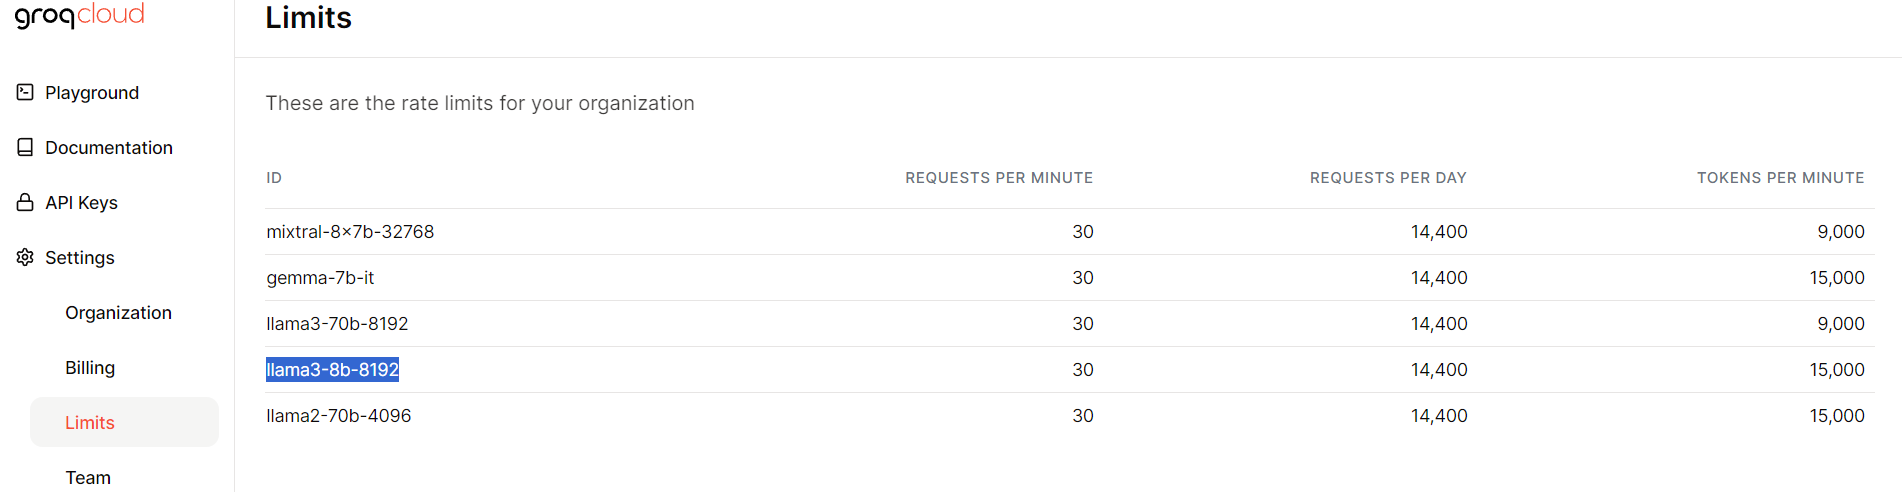

```groq.RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `mixtral-8x7b-32768` in organization `org_01htsyxttnebyt0av6tmfn1fy6` on tokens per minute (TPM): Limit 4500, Used 3867, Requested ~1679. Please try again in 13.940333333s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}```

## Set up  API keys for OpenAI

As RAGAS buy default uses OpenAI models for evaluation ,hence setting the iopenai keys

In [69]:
import os
from google.colab import userdata
import openai
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
openai.api_key = os.environ['OPENAI_API_KEY']

In [72]:
from ragas import evaluate

result = evaluate(
    eval_dataset,
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall,
    ],
)

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

In [73]:
result

{'context_precision': 1.0000, 'faithfulness': 0.8857, 'answer_relevancy': 0.9172, 'context_recall': 1.0000}

In [74]:
results_df = result.to_pandas()
results_df

,question,answer,contexts,ground_truth,context_precision,faithfulness,answer_relevancy,context_recall
0,Question: What special symbols are added to th...,The special symbols added to the input example...,[BERT BERT \nE[CLS] E1 E[SEP] ... ENE1’... EM’...,The special symbols added to the input example...,1.0,1.000000,0.910074,1.0
1,"Question:\nAccording to the passage, what is o...",One example of a supervised task with a large ...,"[2018; Radford et al., 2018; Dai and Le, 2015)...",The passage mentions that transfer learning fr...,1.0,1.000000,0.932776,1.0
2,"Question:\nBased on the provided context, how ...",The BERT model architecture has a number of la...,"[arate ﬁne-tuned models, even though they are ...","Based on the provided context, the BERT model ...",1.0,1.000000,0.877870,1.0
3,Question:\nWhy did the developers choose BERT ...,The developers chose BERT BASE to have the sam...,"[H, and the number of self-attention heads as ...",The developers chose BERT BASE to have the sam...,1.0,1.000000,0.919327,1.0
4,Question: How does the input representation of...,The input representation of BERT unambiguously...,[Input/Output Representations To make BERT\nha...,The input representation of BERT unambiguously...,1.0,1.000000,0.918391,1.0
5,"Question: According to the passage, what are t...",The two unsupervised tasks used to pre-train B...,[ding to every token indicating whether it bel...,The two unsupervised tasks used to pre-train B...,1.0,1.000000,0.905318,1.0
6,Question:\nHow can a deep bidirectional repres...,A deep bidirectional representation can be tra...,[standard conditional language models can only...,A deep bidirectional representation can be tra...,1.0,1.000000,0.888184,1.0
7,"Question: According to the given context, what...","During training, the masked words are replaced...","[denoising auto-encoders (Vincent et al., 2008...","During training, the masked words are replaced...",1.0,1.000000,0.907590,1.0
8,"Question: Based on the given context, what is ...",The purpose of pre-training a model with a bin...,[ence (NLI) are based on understanding the rel...,The purpose of pre-training a model with a bin...,1.0,0.857143,0.944533,1.0
9,"Question: Based on the context, what two sourc...","Based on the provided context, the two sources...",[[CLS] helikesplay## ing[SEP] mydogiscute[SEP]...,The two sources used for the pre-training corp...,1.0,0.000000,0.968233,1.0


## Evaluate Native Chunking Strategy

In [81]:
llama3_chat_model = ChatGroq(temperature=0,
                      model_name="llama3-8b-8192",
                      api_key=userdata.get("GROQ_API_KEY"),)

In [110]:
ground_truth_chain = ground_truth_prompt | chat_model | StrOutputParser()

In [111]:
naive_rag_chain = (
    {"context" : naive_chunk_retriever, "question" : RunnablePassthrough()}
    | rag_prompt
    | chat_model
    | StrOutputParser()
)

In [112]:
import tqdm
questions = []
ground_truths_semantic = []
contexts = []
answers = []
for chunk in tqdm.tqdm(synthetic_data_chunks[10:20]):
  questions.append(question_chain.invoke({"context" : chunk.page_content}))
  contexts.append([chunk.page_content])
  ground_truths_semantic.append(ground_truth_chain.invoke({"question" : questions[-1], "context" : contexts[-1]}))
  answers.append(naive_rag_chain.invoke(questions[-1]))

100%|██████████| 10/10 [04:53<00:00, 29.36s/it]


In [113]:
len(questions), len(answers), len(contexts), len(ground_truths_semantic)

(10, 10, 10, 10)

In [114]:
qagc_list = []

for question, answer, context, ground_truth in zip(questions, answers, contexts, ground_truths_semantic):
  qagc_list.append({
      "question" : question,
      "answer" : answer,
      "contexts" : context,
      "ground_truth" : ground_truth
  })

naive_eval_dataset = Dataset.from_list(qagc_list)

In [115]:
naive_eval_dataset

Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truth'],
    num_rows: 10
})

In [116]:
naive_result = evaluate(
    naive_eval_dataset,
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall,
    ],
)

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

In [117]:
naive_result

{'context_precision': 1.0000, 'faithfulness': 0.9500, 'answer_relevancy': 0.9182, 'context_recall': 1.0000}

In [119]:
result

{'context_precision': 1.0000, 'faithfulness': 0.8857, 'answer_relevancy': 0.9172, 'context_recall': 1.0000}

In [118]:
naive_results_df = naive_result.to_pandas()
naive_results_df

,question,answer,contexts,ground_truth,context_precision,faithfulness,answer_relevancy,context_recall
0,Question: What special symbols are added to th...,The special symbols added to the input example...,[BERT BERT \nE[CLS] E1 E[SEP] ... ENE1’... EM’...,The special symbols added to the input example...,1.0,1.0,0.910074,1.0
1,"Question:\nAccording to the passage, what is o...",One example of a supervised task with a large ...,"[2018; Radford et al., 2018; Dai and Le, 2015)...",The passage mentions that transfer learning fr...,1.0,0.5,0.932371,1.0
2,"Question:\nBased on the provided context, how ...","The BERT model architecture has L layers, wher...","[arate ﬁne-tuned models, even though they are ...","Based on the provided context, the BERT model ...",1.0,1.0,0.878412,1.0
3,Question:\nWhy did the developers choose BERT ...,The developers chose BERT BASE to have the sam...,"[H, and the number of self-attention heads as ...",The developers chose BERT BASE to have the sam...,1.0,1.0,0.919327,1.0
4,Question: How does the input representation of...,The input representation of BERT unambiguously...,[Input/Output Representations To make BERT\nha...,The input representation of BERT unambiguously...,1.0,1.0,0.918391,1.0
5,"Question: According to the passage, what are t...",The two unsupervised tasks used to pre-train B...,[ding to every token indicating whether it bel...,The two unsupervised tasks used to pre-train B...,1.0,1.0,0.905318,1.0
6,Question:\nHow can a deep bidirectional repres...,A deep bidirectional representation can be tra...,[standard conditional language models can only...,A deep bidirectional representation can be tra...,1.0,1.0,0.888336,1.0
7,"Question: According to the given context, what...","During training, the masked words are replaced...","[denoising auto-encoders (Vincent et al., 2008...","During training, the masked words are replaced...",1.0,1.0,0.916917,1.0
8,"Question: Based on the given context, what is ...",The purpose of pre-training a model with a bin...,[ence (NLI) are based on understanding the rel...,The purpose of pre-training a model with a bin...,1.0,1.0,0.944533,1.0
9,"Question: Based on the context, what two sourc...",The two sources used for the pre-training corp...,[[CLS] helikesplay## ing[SEP] mydogiscute[SEP]...,The two sources used for the pre-training corp...,1.0,1.0,0.968233,1.0


In [122]:
results_df.to_csv("Semantic_chunker.csv",index=False)
naive_results_df.to_csv("Native_chunker.csv",index=False)